In [2]:
from keras.layers import Dense,BatchNormalization
from keras.models import Sequential
from sklearn import svm
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

C:\Users\Huang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### BS Formula

In [3]:
def bsPrice(rd,rf,S,K,T,sigma,callput):
    #try:
    #    opttype = {'call':1, 'put':-1}[callput.lower()]
    #except:
    #    raise ValueError('The value of callput must be either "call" or "put".')
    opttype = callput    
    d1 = (np.log(S/K) + (rd-rf+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    price = opttype*(S*np.exp(-rf*T)*norm.cdf(opttype*d1)-K*np.exp(-rd*T)*norm.cdf(opttype*d2))
    return price
    

In [4]:
rd = 0.05
rf = 0
S = 100
K = 95
T = 0.25
sigma = 0.2
bsPrice(rd,rf,S,K,T,sigma,1)

7.714369430203547

### Simulate samples

In [5]:
num = 1000000

rd = np.random.rand(num,1)
rf = np.random.rand(num,1)
S = abs(np.ceil(np.random.rand(num,1)*100))
K = abs(S + np.ceil(np.random.normal(0,1,(num,1))))
callput = np.ones((int(num/2),1))
callput = np.vstack((callput,callput*-1))
np.random.shuffle(callput)
K[K==0]+=1
sigma = np.random.rand(num,1)
T = np.random.rand(num,1)

X = np.concatenate((rd,rf,S,K,sigma,T,callput),axis=1)
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
Y = bsPrice(rd,rf,S,K,T,sigma,callput)

### Train test split

In [7]:
test_ratio = 0.2
num_test = int(test_ratio*X.shape[0])
X_train = X[num_test:]
X_test = X[:num_test]
Y_train = Y[num_test:]
Y_test = Y[:num_test]

### Train the Neural Network

In [12]:
model = Sequential()
#model.add(BatchNormalization(input_shape=[7]))
model.add(Dense(128, input_shape = [7], activation='relu'))
model.add(Dense(128,activation ='relu'))
model.add(Dense(1, activation ='relu'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

hist = model.fit(x=X_train, y=Y_train, batch_size=64, epochs=20, verbose=1, callbacks=None, validation_split=0.2,shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
_________________________________________________________________
Train on 640000 samples, validate on 160000 samples
Epoch 1/20
640000/640000 [==============================] - 13s 21us/step - loss: 0.5480 - val_loss: 0.1258
Epoch 2/20
640000/640000 [==============================] - 12s 19us/step - loss: 0.0913 - val_loss: 0.0851
Epoch 3/20
640000/640000 [==============================] - 12s 18us/step - loss: 0.0538 - val_loss: 0.0337
Epoch 4/20
640000/640000 [

### Train and cross validation mean squared error

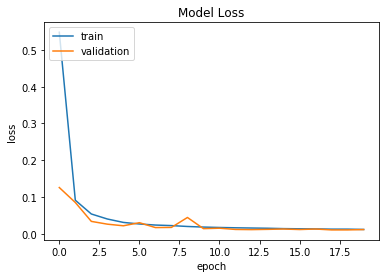

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

### Evaluate test set

In [15]:
predicted = model.predict(X_test)

In [16]:
loss=model.evaluate(x=X_test,y=Y_test)
print('Test Mean Squared Error is: {}'.format(loss))

200000/200000 [==============================] - 3s 16us/step
Test Mean Squared Error is: 0.011211244390644134


In [17]:
def f(x):
    return x

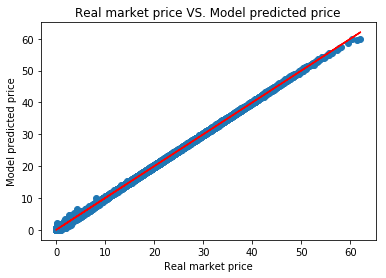

In [18]:
plt.plot(Y_test,predicted,'o')
plt.plot(Y_test,f(Y_test),'r-')
plt.title('Real market price VS. Model predicted price')
plt.xlabel('Real market price')
plt.ylabel('Model predicted price')
plt.show()

In [27]:
diff = {}
for i,pred in enumerate(predicted):
    diff[i]=abs(pred-Y_test[i])
diff = zip(diff.values(),diff.keys())
worst10 = sorted(diff,reverse=True)[:10]
print("Worst 10 matches\n")
for item in worst10:
    ind = item[1]
    print("Real Market Price is: {}".format(Y_test[ind]))
    print("Model Predicted Price is: {}\n".format(predicted[ind]))

Worst 10 matches

Real Market Price is: 62.036541836589215
Model Predicted Price is: [59.805588]

Real Market Price is: 4.225903680473486
Model Predicted Price is: [6.410399]

Real Market Price is: 8.162644755894718
Model Predicted Price is: [10.078527]

Real Market Price is: 2.8646751281825686
Model Predicted Price is: [4.762044]

Real Market Price is: 0.15065724491446275
Model Predicted Price is: [2.0350022]

Real Market Price is: 2.739302980305041
Model Predicted Price is: [4.5782294]

Real Market Price is: 3.6936392419733153
Model Predicted Price is: [5.3859158]

Real Market Price is: 0.2310697776969306
Model Predicted Price is: [1.856147]

Real Market Price is: 61.276681087979306
Model Predicted Price is: [59.659164]

Real Market Price is: 1.8010049055017987
Model Predicted Price is: [3.301388]

